# DSMarket - First look at input files

## 1. Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import folium
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import locale
from datetime import datetime
import seaborn as sns 
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from downcast import reduce
import warnings
from plotly.io import to_image
from IPython.display import Image
import pickle
from itertools import cycle
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## 2. Paths and directories

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
sales_data_path = r'C:\Users\pazcr\OneDrive\Escritorio\TFM\DSMarket\data_dsmarket\data_dsmarket\item_sales.csv'
calendar_data_path =  r'C:\Users\pazcr\OneDrive\Escritorio\TFM\DSMarket\data_dsmarket\data_dsmarket\daily_calendar_with_events.csv'
prices_data_path = r'C:\Users\pazcr\OneDrive\Escritorio\TFM\DSMarket\data_dsmarket\data_dsmarket\item_prices.csv'

In [4]:
#Carga los datos en un DataFrame y cambia el nombre
pd_sales = pd.read_csv(sales_data_path, sep = ",")
print("La dimensió de datos de Sales es:", pd_sales.shape) # total de  filas,columnas
pd_calendar = pd.read_csv(calendar_data_path, sep = ",")
print("La dimensió de datos de Calendar es :", pd_calendar.shape)
pd_prices = pd.read_csv(prices_data_path, sep = ",")
print("La dimensió de datos de Prices es :", pd_prices.shape)

La dimensió de datos de Sales es: (30490, 1920)
La dimensió de datos de Calendar es : (1913, 5)
La dimensió de datos de Prices es : (6965706, 5)


## 3. Import files

### 3A. Sales data

In [5]:
pd_sales = pd.read_csv(sales_data_path, sep = ",")
print("The shape of the sales datataframe is :", pd_sales.shape)

The shape of the sales datataframe is : (30490, 1920)


In [6]:
pd_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,

In [97]:
pd_sales.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 1920 columns):
 #     Column      Dtype 
---    ------      ----- 
 0     id          object
 1     item        object
 2     category    object
 3     department  object
 4     store       object
 5     store_code  object
 6     region      object
 7     d_1         int64 
 8     d_2         int64 
 9     d_3         int64 
 10    d_4         int64 
 11    d_5         int64 
 12    d_6         int64 
 13    d_7         int64 
 14    d_8         int64 
 15    d_9         int64 
 16    d_10        int64 
 17    d_11        int64 
 18    d_12        int64 
 19    d_13        int64 
 20    d_14        int64 
 21    d_15        int64 
 22    d_16        int64 
 23    d_17        int64 
 24    d_18        int64 
 25    d_19        int64 
 26    d_20        int64 
 27    d_21        int64 
 28    d_22        int64 
 29    d_23        int64 
 30    d_24        int64 
 31    d_25        int64 
 32  

In [7]:
# Filtra solo las columnas categóricas (todos los días "d_1-d_1913 son int")
cat_columns = pd_sales.select_dtypes(include=['object']).columns
pd_sales_cat = pd_sales[cat_columns]
# Obtenemos el resumen descriptivo
describe_cat = pd_sales_cat.describe()
describe_cat_T = describe_cat.T #muestra el resumen descriptivo de las variables categóricas con transposición
describe_cat_T

,count,unique,top,freq
id,30490,30490,ACCESORIES_1_001_NYC_1,1
item,30490,3049,ACCESORIES_1_001,10
category,30490,3,SUPERMARKET,14370
department,30490,7,SUPERMARKET_3,8230
store,30490,10,Greenwich_Village,3049
store_code,30490,10,NYC_1,3049
region,30490,3,New York,12196


In [8]:
num_dias = pd_sales.shape[1] - 7 #menos 7 para ignorar  las 7 variables categóricas y así contabilizar cuantos días hay                  
print("Tenemos" , num_dias," de días de registros en total")

Tenemos 1913  de días de registros en total


In [9]:
pd_sales['item'].value_counts()

item
ACCESORIES_1_001       10
SUPERMARKET_2_210      10
SUPERMARKET_2_201      10
SUPERMARKET_2_202      10
SUPERMARKET_2_203      10
                       ..
HOME_&_GARDEN_1_464    10
HOME_&_GARDEN_1_465    10
HOME_&_GARDEN_1_466    10
HOME_&_GARDEN_1_467    10
SUPERMARKET_3_827      10
Name: count, Length: 3049, dtype: int64

In [11]:
print('Cantidad de items/ID(identificador de ventas):',len(pd_sales['id'].unique())) #El "id"(identificador de Ventas es la unión de Item y Store_code)
print('Cantidad de items:',len(pd_sales['item'].unique()))
print('Cantidad de categorías:',len(pd_sales['category'].unique()))
print('Cantidad de departamentos:',len(pd_sales['department'].unique()))
print('Cantidad Tiendas:',len(pd_sales['store'].unique()))
print('Cantidad Códigos de Tienda:',len(pd_sales['store_code'].unique()))
print('Cantidad de Regiones:',len(pd_sales['region'].unique()))

Cantidad de items/ID(identificador de ventas): 30490
Cantidad de items: 3049
Cantidad de categorías: 3
Cantidad de departamentos: 7
Cantidad Tiendas: 10
Cantidad Códigos de Tienda: 10
Cantidad de Regiones: 3


In [12]:
columnas_value_counts= ['category', 'department', 'region']

for columna in columnas_value_counts:
    conteo_valores = pd_sales[columna].value_counts()
    print("Conteo de valores únicos para la columna '" + columna + "':\n", conteo_valores, "\n")

Conteo de valores únicos para la columna 'category':
 category
SUPERMARKET      14370
HOME_&_GARDEN    10470
ACCESORIES        5650
Name: count, dtype: int64 

Conteo de valores únicos para la columna 'department':
 department
SUPERMARKET_3      8230
HOME_&_GARDEN_1    5320
HOME_&_GARDEN_2    5150
ACCESORIES_1       4160
SUPERMARKET_2      3980
SUPERMARKET_1      2160
ACCESORIES_2       1490
Name: count, dtype: int64 

Conteo de valores únicos para la columna 'region':
 region
New York        12196
Boston           9147
Philadelphia     9147
Name: count, dtype: int64 



In [13]:
pd_sales.store.unique() # 10 tiendas   

array(['Greenwich_Village', 'Harlem', 'Tribeca', 'Brooklyn', 'South_End',
       'Roxbury', 'Back_Bay', 'Midtown_Village', 'Yorktown',
       'Queen_Village'], dtype=object)

In [14]:
pd_sales.store_code.unique()  #7 store_code

array(['NYC_1', 'NYC_2', 'NYC_3', 'NYC_4', 'BOS_1', 'BOS_2', 'BOS_3',
       'PHI_1', 'PHI_2', 'PHI_3'], dtype=object)

How many **stores** are there in the data?

In [15]:
print("Hay {} tiendas en los datos y el número de registros por tienda son: ".format(pd_sales.store.nunique()))
pd_sales.store.value_counts() #Hay {10} tiendas en los datos y el número de registros por tienda es"

Hay 10 tiendas en los datos y el número de registros por tienda son: 


store
Greenwich_Village    3049
Harlem               3049
Tribeca              3049
Brooklyn             3049
South_End            3049
Roxbury              3049
Back_Bay             3049
Midtown_Village      3049
Yorktown             3049
Queen_Village        3049
Name: count, dtype: int64

How many **departments**?

In [16]:
print("Hay {} departamentos en los datos y el número de registros por departamento es: ".format(pd_sales.department.nunique()))
pd_sales.department.value_counts()

Hay 7 departamentos en los datos y el número de registros por departamento es: 


department
SUPERMARKET_3      8230
HOME_&_GARDEN_1    5320
HOME_&_GARDEN_2    5150
ACCESORIES_1       4160
SUPERMARKET_2      3980
SUPERMARKET_1      2160
ACCESORIES_2       1490
Name: count, dtype: int64

And **items**?

In [17]:
print("Hay {} items en los datos, y el número de registros por item son: ".format(pd_sales.item.nunique()))
pd_sales.item.value_counts()  #Hay 3049 elementos en los datos y el número de registros por elemento es:

Hay 3049 items en los datos, y el número de registros por item son: 


item
ACCESORIES_1_001       10
SUPERMARKET_2_210      10
SUPERMARKET_2_201      10
SUPERMARKET_2_202      10
SUPERMARKET_2_203      10
                       ..
HOME_&_GARDEN_1_464    10
HOME_&_GARDEN_1_465    10
HOME_&_GARDEN_1_466    10
HOME_&_GARDEN_1_467    10
SUPERMARKET_3_827      10
Name: count, Length: 3049, dtype: int64

Do we have one register per id? In other words, can two registers have the same id?(¿Tenemos un registro por identificación? En otras palabras, ¿pueden dos registros tener la misma identificación?) No hay dos registros con la misma identificación, al parecer no había duplicados en la columna id, son valores únicos en id.

In [18]:
print(pd_sales.shape)
print(pd_sales.id.drop_duplicates().shape)

(30490, 1920)
(30490,)


In [19]:
pd_sales[pd_sales.id == 'ACCESORIES_1_002_NYC_1'].T

,1
id,ACCESORIES_1_002_NYC_1
item,ACCESORIES_1_002
category,ACCESORIES
department,ACCESORIES_1
store,Greenwich_Village
...,...
d_1909,1
d_1910,0
d_1911,0
d_1912,0


In [20]:
pd_sales.isnull().sum()

id            0
item          0
category      0
department    0
store         0
             ..
d_1909        0
d_1910        0
d_1911        0
d_1912        0
d_1913        0
Length: 1920, dtype: int64

In [21]:
# Mapa de las ventas totales por ciudad  para ello: 
# sumamos las ventas totales por ciudad
total_sales_by_city = pd_sales.filter(regex='d_.*|region').groupby('region').sum().sum(axis=1)

# Coordenadas de las ciudades
city_locations = {
    'New York': {'lat': 40.7128, 'lon': -74.0060},
    'Boston': {'lat': 42.3601, 'lon': -71.0589},
    'Philadelphia': {'lat': 39.9526, 'lon': -75.1652}
}

# Creamos un mapa centrado en las 3 ciudades que tenemos en "Region"      
map = folium.Map(location=[40.7128, -74.0060], zoom_start=6)

# Aquí añadimos marcadores al mapa  
for city, sales in total_sales_by_city.items():
    location = city_locations.get(city)
    if location:
        folium.Marker(
            [location['lat'], location['lon']],
            popup=f'{city}: {sales} ventas totales',
            tooltip=f'{city}'
        ).add_to(map)

#map.save('/mnt/data/sales_map.html') # si quisieramos guardar el mapa en un archivo HTML                    
map 

### 3B. Calendar data

In [22]:
pd_calendar = pd.read_csv(calendar_data_path, sep = ",")
print("The shape of the calendar datataframe is :", pd_calendar.shape)

The shape of the calendar datataframe is : (1913, 5)


La semana se determina como Sábado como el día 1 y viernes como el día 7, por lo que la última semana es incompleta ya que tenemos datos desde el 29 de enero del 2011 hasta el domingo 24 de abril, esta última semana sería sábado 23 y domingo 24 

In [98]:
pd_calendar.head(10) 

,date,weekday,weekday_int,d,event,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,"201,105.00"
1,2011-01-30,Sunday,2,d_2,NaN,"201,105.00"
2,2011-01-31,Monday,3,d_3,NaN,"201,105.00"
3,2011-02-01,Tuesday,4,d_4,NaN,"201,105.00"
4,2011-02-02,Wednesday,5,d_5,NaN,"201,105.00"
5,2011-02-03,Thursday,6,d_6,NaN,"201,105.00"
6,2011-02-04,Friday,7,d_7,NaN,"201,105.00"
7,2011-02-05,Saturday,1,d_8,NaN,"201,106.00"
8,2011-02-06,Sunday,2,d_9,SuperBowl,"201,106.00"
9,2011-02-07,Monday,3,d_10,NaN,"201,106.00"


In [24]:
pd_calendar.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [25]:
print("The range of dates available are: {} - {}".format(pd_calendar['date'].min(),pd_calendar['date'].max()))

The range of dates available are: 2011-01-29 - 2016-04-24


What sort of events do we have?

In [26]:
pd_calendar.event.value_counts()

event
SuperBowl         6
Ramadan starts    5
Thanksgiving      5
NewYear           5
Easter            5
Name: count, dtype: int64

We don't have a lot of events, but we can think about including additional ones in a later stage (it might help!)-No tenemos muchos eventos, pero podemos pensar en incluir más en una etapa posterior (¡podría ayudar!)

(Añadiremos posteriormente el evento de día  laboral(lunes-viernes) y fines de semana). Así como Navidad(25 de diciembre)y                                                          día de la independencia  (4 de julio)

In [27]:
pd_calendar.isnull().sum()

date              0
weekday           0
weekday_int       0
d                 0
event          1887
dtype: int64

In [28]:
pd2_calendar = pd_calendar.copy()

In [29]:
pd2_calendar["event"].fillna("no event", inplace=True)

In [30]:
pd2_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,no event
1,2011-01-30,Sunday,2,d_2,no event
2,2011-01-31,Monday,3,d_3,no event
3,2011-02-01,Tuesday,4,d_4,no event
4,2011-02-02,Wednesday,5,d_5,no event


In [31]:
pd2_calendar["event"].value_counts(dropna=False)

event
no event          1887
SuperBowl            6
Ramadan starts       5
Thanksgiving         5
NewYear              5
Easter               5
Name: count, dtype: int64

### 3C. Prices data

In [32]:
pd_prices = pd.read_csv(prices_data_path, sep = ",")
print("The shape of the prices datataframe is :", pd_prices.shape)

The shape of the prices datataframe is : (6965706, 5)


In [33]:
pd_prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,328.00",12.74
1,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,329.00",12.74
2,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,330.00",10.99
3,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,331.00",10.99
4,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,332.00",10.99


In [34]:
pd_prices.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


Same number of items in the prices data?

In [35]:
print("There are {} items in the data, and the number of registers per item are: ".format(pd_prices.item.nunique()))
pd_prices.item.value_counts()

There are 3049 items in the data, and the number of registers per item are: 


item
SUPERMARKET_3_587      2870
HOME_&_GARDEN_1_177    2870
HOME_&_GARDEN_2_283    2870
ACCESORIES_1_337       2870
SUPERMARKET_1_032      2870
                       ... 
HOME_&_GARDEN_1_308     652
HOME_&_GARDEN_1_159     633
HOME_&_GARDEN_1_242     610
SUPERMARKET_3_296       602
SUPERMARKET_2_379       543
Name: count, Length: 3049, dtype: int64

The number of items does match, but there are many registers per item. It seems that prices per item can change with time. (El número de artículos coincide, pero hay muchos registros por artículo. Parece que los precios por artículo pueden cambiar con el tiempo.)

Let's take a loook at the variables distribution of the prices dataframe(Let's take a loook at the variables distribution of the prices dataframe)

In [36]:
pd_prices.describe()

,yearweek,sell_price
count,"6,721,786.00","6,965,706.00"
mean,"201,382.42",5.52
std,145.02,4.39
min,"201,105.00",0.01
25%,"201,248.00",2.62
50%,"201,410.00",4.20
75%,"201,515.00",7.18
max,"201,617.00",134.15


In [37]:
pd_prices.describe(include=['object'])

,item,category,store_code
count,6965706,6965706,6965706
unique,3049,3,10
top,SUPERMARKET_3_587,SUPERMARKET,BOS_2
freq,2870,3239821,713960


In [38]:
pd_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [39]:
from datetime import datetime, timedelta
def weekyearnum(dt):
    return dt.strftime("%Y%W")

def myweeyearknum(dt):
    offsetdt = dt + timedelta(days=+2);  # you add 3 days to Mon to get to Thu
    return weekyearnum(offsetdt)

def weeknum(dt):
    return dt.isocalendar()[1]

def myweeknum(dt):
    offsetdt = dt + timedelta(days=+2);  # you add 3 days to Mon to get to Thu
    return weeknum(offsetdt)

In [40]:
## Merge
pd_calendar['date'] = pd.to_datetime(pd_calendar['date'], format = "%Y-%m-%d")

pd_calendar['yearweek'] = pd_calendar['date'].apply(lambda x: myweeyearknum(x))

In [41]:
pd_calendar

,date,weekday,weekday_int,d,event,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,201105
1,2011-01-30,Sunday,2,d_2,NaN,201105
2,2011-01-31,Monday,3,d_3,NaN,201105
3,2011-02-01,Tuesday,4,d_4,NaN,201105
4,2011-02-02,Wednesday,5,d_5,NaN,201105
...,...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN,201616
1909,2016-04-21,Thursday,6,d_1910,NaN,201616
1910,2016-04-22,Friday,7,d_1911,NaN,201616
1911,2016-04-23,Saturday,1,d_1912,NaN,201617


In [42]:
pd_calendar['yearweek'] = pd_calendar['yearweek'].astype(float)
pd_merge = pd.merge(pd_prices,pd_calendar[['d','yearweek']], how="left",
                   left_on = 'yearweek', right_on = 'yearweek')

pd_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46271877 entries, 0 to 46271876
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
 5   d           object 
dtypes: float64(2), object(4)
memory usage: 2.1+ GB


In [43]:
pd_sales.set_index(['id','item','category','department','store','store_code','region']).head()

,,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
id,item,category,department,store,store_code,region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [44]:
pd_calendar

,date,weekday,weekday_int,d,event,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,"201,105.00"
1,2011-01-30,Sunday,2,d_2,NaN,"201,105.00"
2,2011-01-31,Monday,3,d_3,NaN,"201,105.00"
3,2011-02-01,Tuesday,4,d_4,NaN,"201,105.00"
4,2011-02-02,Wednesday,5,d_5,NaN,"201,105.00"
...,...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN,"201,616.00"
1909,2016-04-21,Thursday,6,d_1910,NaN,"201,616.00"
1910,2016-04-22,Friday,7,d_1911,NaN,"201,616.00"
1911,2016-04-23,Saturday,1,d_1912,NaN,"201,617.00"


In [45]:
sales_ca=pd_sales[pd_sales['region']=='New York'].loc[:,'d_1':].sum(axis=0)
sales_wi=pd_sales[pd_sales['region']=='California'].loc[:,'d_1':].sum(axis=0)
#sales_tx=pd_sales[pd_sales['state_id']=='TX'].loc[:,'d_1':].sum(axis=0) no tenemos texas

state_sales_df=pd.DataFrame({'sales_ca':list(sales_ca),
                             'sales_wi':list(sales_wi),
                             'date':list(pd_calendar['date']),
                             'weekday':pd_calendar['weekday_int'],
                              'yearweek':pd_calendar['yearweek'],
                              'weekday_int':pd_calendar['weekday_int']})

In [46]:
state_sales_df.head()

,sales_ca,sales_wi,date,weekday,yearweek,weekday_int
0,14195,0,2011-01-29,1,"201,105.00",1
1,13805,0,2011-01-30,2,"201,105.00",2
2,10108,0,2011-01-31,3,"201,105.00",3
3,11047,0,2011-02-01,4,"201,105.00",4
4,9925,0,2011-02-02,5,"201,105.00",5


In [47]:
pd_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


### DATA UNDERSTANDING


In [48]:
pd2_sales = pd_sales.copy()
pd2_calendar = pd_calendar.copy()
pd2_prices = pd_prices.copy()

In [49]:
print(pd2_sales.describe())
print(pd2_sales['item'].nunique())

            d_1       d_2       d_3       d_4       d_5       d_6       d_7  \
count 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00   
mean       1.07      1.04      0.78      0.83      0.63      0.96      0.92   
std        5.13      5.37      3.67      4.42      3.38      4.79      5.06   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
75%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
max      360.00    436.00    207.00    323.00    296.00    314.00    316.00   

            d_8       d_9      d_10      d_11      d_12      d_13      d_14  \
count 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00 30,490.00   
mean       1.24      1.07      0.84      0.76      0.78      0.78      0.87   
std        6.62      5.92      4.21      3.67      

In [50]:
# Creamos una variable temporal en donde solamente dejamos los valores numéricos, para después agrupar en esa variable por la columna de categoria.
# Selecciona solo columnas numéricas para la operación de agregación
numeric_columns = pd2_sales.select_dtypes(include=['int64', 'float64']).columns

# Ahora podemos agrupar por 'category' (o cualquier otra columna no numérica) y calcular la media solo de las columnas numéricas
grouped_sales = pd2_sales.groupby('category')[numeric_columns].mean()

sum_sales = pd2_sales.groupby('category')[numeric_columns].sum()

In [51]:
grouped_sales.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES,0.67,0.59,0.47,0.47,0.32,0.57,0.52,0.71,0.51,0.46,0.45,0.43,0.48,0.50,0.65,0.60,0.40,0.45,0.38,0.36,0.40,0.73,0.53,0.48,0.44,0.49,0.45,0.47,0.72,0.37,0.31,0.32,0.30,0.33,0.29,0.37,0.67,0.48,0.45,0.52,0.48,0.48,0.64,0.58,0.44,0.45,0.48,0.43,0.48,0.66,0.56,0.44,0.41,0.42,0.42,0.57,0.62,0.63,0.48,0.42,0.44,0.55,0.63,0.71,0.62,0.51,0.

In [52]:
sum_sales.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES,3764,3357,2682,2669,1814,3220,2944,3986,2899,2615,2547,2457,2700,2822,3699,3417,2233,2554,2170,2049,2284,4142,2978,2735,2459,2758,2559,2675,4088,2118,1771,1833,1675,1855,1653,2096,3795,2687,2519,2955,2686,2688,3630,3282,2500,2522,2736,2434,2687,3702,3174,2499,2303,2384,2347,3239,3524,3537,2738,2388,2503,3120,3544,3996,3504,2862,23

In [53]:

# Primero, creamos una lista de las columnas de ventas diarias.
sales_columns = [col for col in pd2_sales.columns if col.startswith('d_')]

# Luego, sumamos las ventas diarias para obtener el total de ventas por producto.
pd2_sales['total_sales'] = pd2_sales[sales_columns].sum(axis=1)

# Finalmente, agrupamos por 'category' y sumas el total de ventas por categoría.
total_sales_by_category = pd2_sales.groupby('category')['total_sales'].sum().reset_index()

In [54]:
total_sales_by_category.head()

,category,total_sales
0,ACCESORIES,6124800
1,HOME_&_GARDEN,14480670
2,SUPERMARKET,45089939


In [55]:
pd2_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0

In [56]:
pd2_sales.shape

(30490, 1921)

### Agrupación por ventas(Distribución general de los productos)                               

> Agrupación para analizar tendencias de ventas por categoría y departamento a través de diferentess regiones y códigos de tiendas, ya que Category y Departament son dimensiones que permiten agrupar productos en segmentos más amplios, facilitando la identificación de patrones de ventas generales en lugar de enfocarnos en detalles de productos individuales(items).

Contamos ID porque es una manera común de contar el número de veces que cada Identificador único(id) aparece dentro de cada grupo/ asi obtenemos el número total de ventas dentro de cada grupo, aseguramos así que el conteo sea preciso, 

> Dropna: si hay algun dato incompleto, dropna se asegura de eliminar esos nulos para asegurar que el conteo sea más preciso.

> Así el enfoque se coloca en el análisis del producto para entender que productos tienen un volumen de venta alto y bajo, donde podría haber oportunidades de expansión o necesidad de reducción de inventario. Entender como las preferencias de productos pueden variar por región, permitiendo ajustar la oferta de productos en tiendas específicas para maximizar las ventas, recordemos que los valores de Store son Barrios/vecindarios, no ciudades.Store_code da suficiente detalle para identificar la ubicación de ventas, así que de esta manera podemos tener un análisis más claro

> En resumen se podría decir que este enfoque ayuda a las empresas a ser más estratégicas en como se manejan inventarios y estrategias de marketing, asegurando que se preocupen en cubrir lo que los clientes buscan más y mejorar áreas de bajo rendimiento

In [57]:
#item no se incluye directamente porque id es union d item y storecode.
group_vent = pd_sales.groupby(['region','store_code','category','department'], as_index=False)['id'].count().dropna() # Index=False ayuda a mantener el dataframe de la siguiente manera para facilitar realizar operaciones y el análisis
group_vent['USA'] = 'United States of America' 
group_vent.rename(columns={'region':'Region','store_code':'Store','category':'Category','department':'Department','id':'Count'},inplace=True) #tan solo renombra las columnas

> Lo siguiente: #Elimina las filas donde el recuento Count es igual a 0, importante para enfocarnos en datos que han tenido al menos una entrada/venta, esto ayuda a limpiar los datos y enfocarnos en la información relevante y visualizarlo mejor

In [58]:
group_vent = group_vent[group_vent['Count'] > 0] 

In [59]:
group_vent.tail(3)

,Region,Store,Category,Department,Count,USA
67,Philadelphia,PHI_3,SUPERMARKET,SUPERMARKET_1,216,United States of America
68,Philadelphia,PHI_3,SUPERMARKET,SUPERMARKET_2,398,United States of America
69,Philadelphia,PHI_3,SUPERMARKET,SUPERMARKET_3,823,United States of America


> Gráfico de treemap: este cuadro nos facilita ver las tendencias el cual se repiten mucho la misma cantidad de productos, por ejemplo está claro que en todas las zonas lo más vendido es Supermarket_3(amarillo) y la menor Accesorios 2 (cuadro morado más pequño )y que new york contiene más productos que son 12.196      
 
 > Es una visualización jerárquica de la distribución de los artículos por categorías correspondientes a las regiones.
>En el Treemap, los cuadros más pequeños con colores más obscuros pueden representar menor cantidad de ventas, mientras que los colores más claros se refiere a mayor cantidad de ventas, por ello los cuadros más pequeños morados tienen una catidad de 149 y los amarillos 823.

> Están organizados por regiones y subcategorías por eso empieza desde lo más grande "united States Of America" a Regiones como new york, boston y debajo las subcategorías correspondientes a sus zonas.

>Por ejemplo si ponemos el cursor en el primer cuadro amarillo de la izquierda, nos sale información en la que "Labels:SUPERMARKET_3" es Department de Group, "Parent:SUPERMARKET" es Category, "Count_sum=823" es la columna Count que representan las ventas totales de dicho grupo, todo esto se puede comprobar en la tabla de Group. "Count=823" pues sería la representación numérica del cuadrito que visualiza Plotly(treemap) asi que esto no hay que hacerle mucho caso.

> Cuando ponemos cursor en el cuadro más grande que engloba solo a las subcategorías de supermarket_1/2 y 3, osea me refiero al cuadro verde claro "SUPERMARKET" que es la categoría en este caso, "Count_sum=1437" es el resultado de la suma de esas 3 subcategorías (cuadros amarillos,azul y morado de Supermarket). "Parents_NYC_1" pertenece a Store de group

In [60]:
fig2 = px.treemap(group_vent, path=['USA', 'Region', 'Store', 'Category', 'Department'], values='Count',
                  color='Count',
                  color_continuous_scale=px.colors.sequential.Viridis,
                  title='Distribución de Items')
fig2.update_layout(template='seaborn')
fig2.show()

In [61]:
pd2_sales 

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0

In [62]:
pd2_sales["region"].unique()

array(['New York', 'Boston', 'Philadelphia'], dtype=object)

### AGRUPACIONES POR CIUDAD

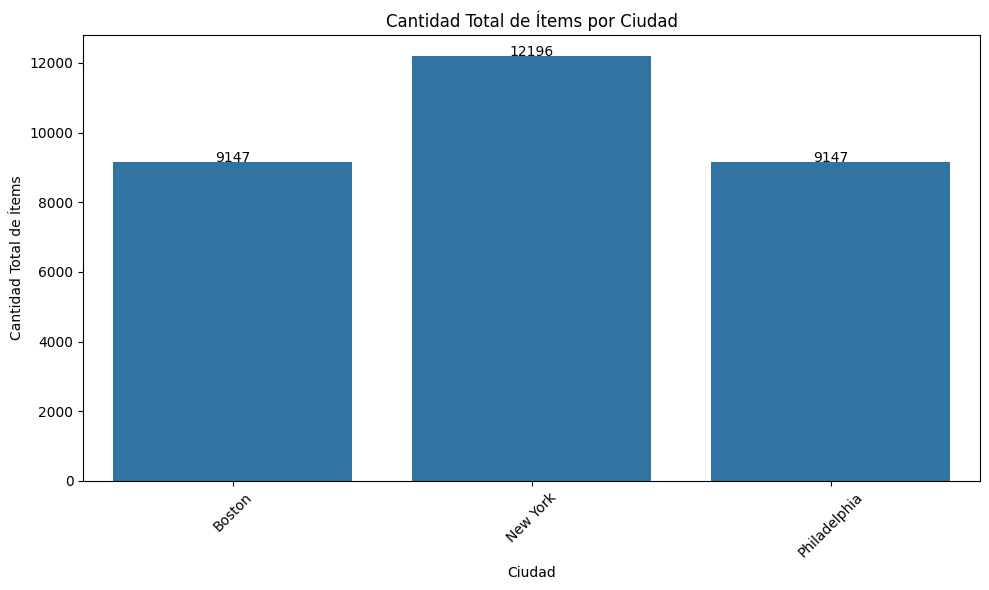

In [63]:

city_sales = group_vent.groupby('Region')['Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Region', y='Count', data=city_sales)
plt.title('Cantidad Total de Ítems por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad Total de Ítems')
plt.xticks(rotation=45)                               
for index, value in enumerate(city_sales['Count']):
    plt.text(index, value, str(value), ha='center')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

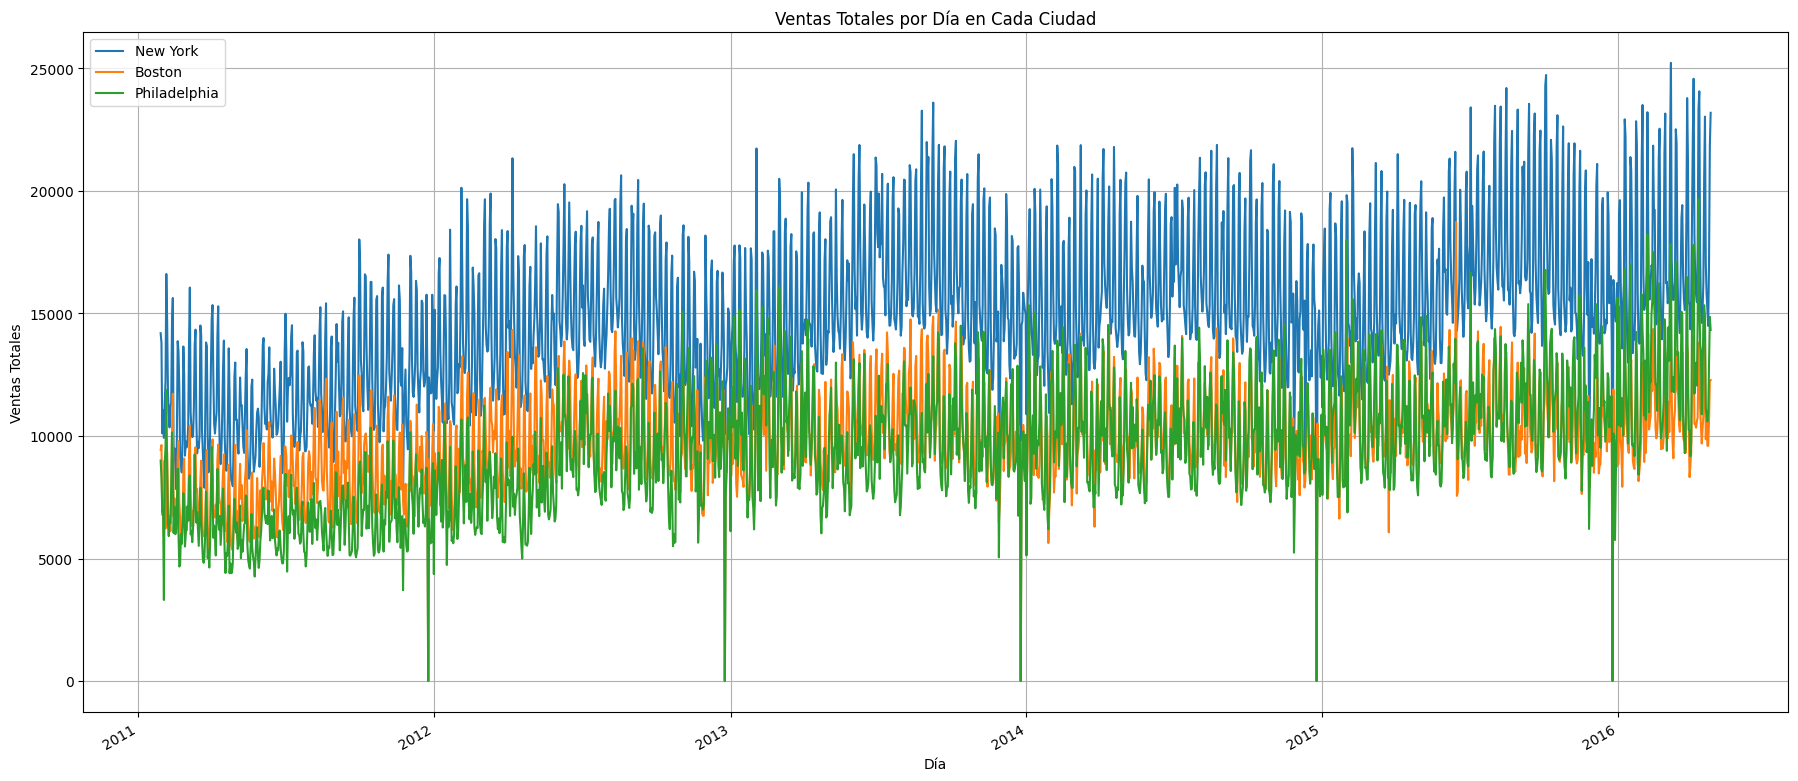

In [64]:
#Gráfico lineal del total de ventas por ciudad

sales_by_day = pd2_sales.filter(regex='d_.*|region')
sales_by_city = sales_by_day.groupby('region').sum().transpose()
sales_by_city.reset_index(inplace=True)
sales_by_city.rename(columns={'index': 'Day'}, inplace=True)
sales_by_city['Day'] = pd.date_range(start='2011-01-29', periods=len(sales_by_city), freq='D')

plt.figure(figsize=(22, 10))

for city in ['New York', 'Boston', 'Philadelphia']:
    plt.plot(sales_by_city['Day'], sales_by_city[city], label=city)

plt.legend()
plt.title('Ventas Totales por Día en Cada Ciudad')
plt.xlabel('Día')
plt.ylabel('Ventas Totales')
plt.grid(True)

plt.gcf().autofmt_xdate()

plt.show()

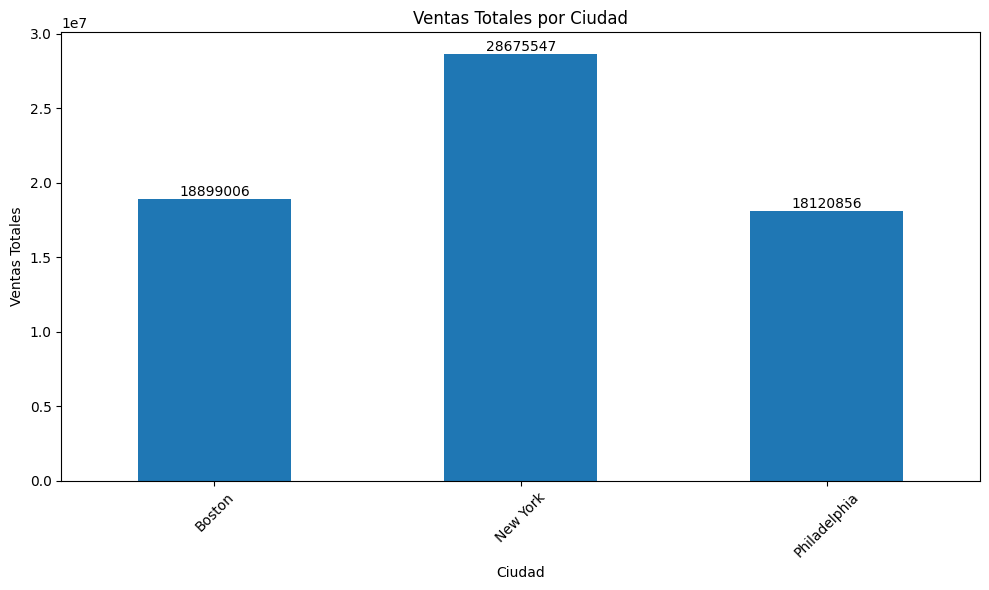

In [65]:
#Plot del total de ventas por ciudad
sales_by_day = pd2_sales.filter(regex='d_.*|region')
total_sales_by_city = sales_by_day.groupby('region').sum().sum(axis=1)

plt.figure(figsize=(10, 6))
total_sales_by_city.plot(kind='bar')

for index, value in enumerate(total_sales_by_city):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Ventas Totales por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [66]:
# Suma las ventas diarias para cada producto y agrupa por 'region' y 'item'
city_sales = pd2_sales.groupby(['region', 'item'])[sales_columns].sum().sum(axis=1).reset_index(name='total_sales')

# Ordena para encontrar los más vendidos por ciudad
most_sold_by_city = city_sales.sort_values(['region', 'total_sales'], ascending=[True, False])

# Ordena para encontrar los menos vendidos por ciudad
least_sold_by_city = city_sales.sort_values(['region', 'total_sales'], ascending=[True, True])

In [67]:
city_sales.head()

,region,item,total_sales
0,Boston,ACCESORIES_1_001,1047
1,Boston,ACCESORIES_1_002,878
2,Boston,ACCESORIES_1_003,378
3,Boston,ACCESORIES_1_004,9695
4,Boston,ACCESORIES_1_005,4142


In [68]:
most_sold_by_city.head()

,region,item,total_sales
2810,Boston,SUPERMARKET_3_586,455411
2314,Boston,SUPERMARKET_3_090,328034
2476,Boston,SUPERMARKET_3_252,257079
2779,Boston,SUPERMARKET_3_555,244685
2601,Boston,SUPERMARKET_3_377,164976


In [69]:
least_sold_by_city.head()

,region,item,total_sales
1197,Boston,HOME_&_GARDEN_2_101,111
2395,Boston,SUPERMARKET_3_171,118
1898,Boston,SUPERMARKET_2_071,126
210,Boston,ACCESORIES_1_217,143
1173,Boston,HOME_&_GARDEN_2_077,149


### AGRUPACIONES POR CATEGORIA

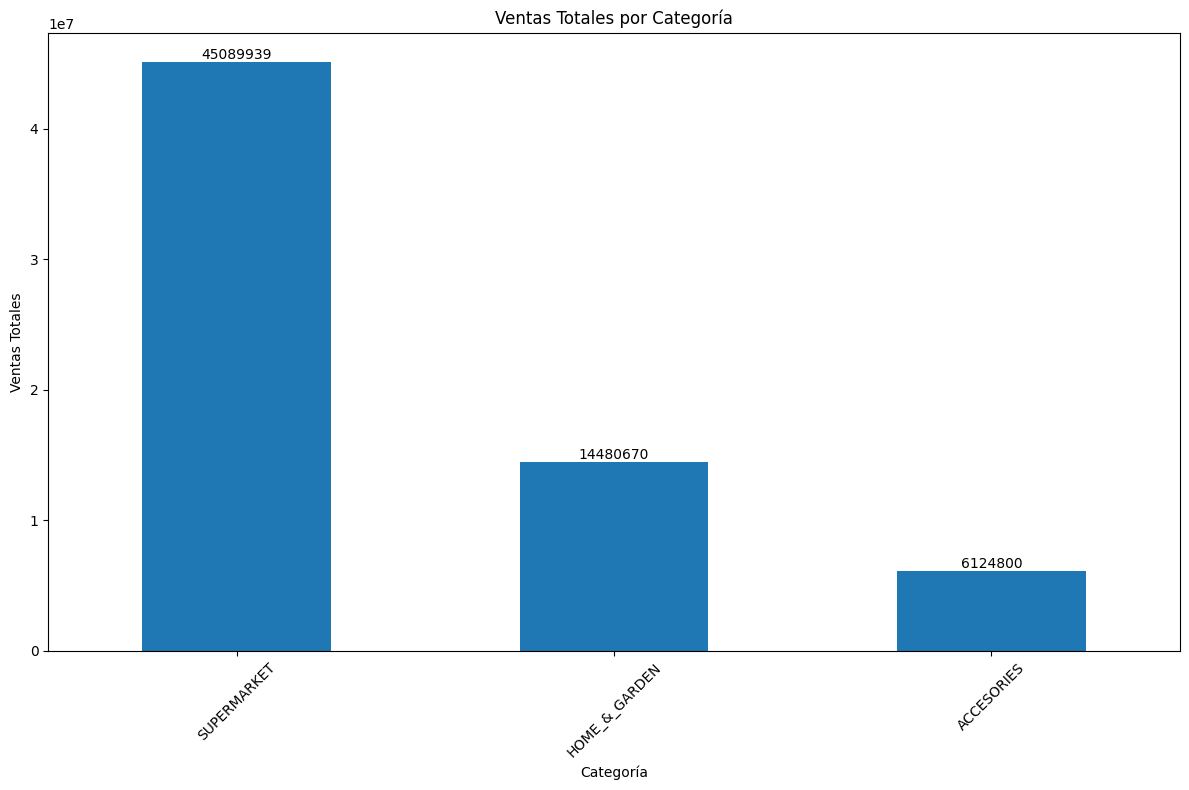

In [70]:

# Filtramos las columnas de ventas diarias y la categoría
sales_by_category = pd2_sales.filter(regex='d_.*|category')

# Agrupamos por categoría y sumamos las ventas totales
total_sales_by_category = sales_by_category.groupby('category').sum().sum(axis=1)

# Ordenamos las categorías por ventas totales
total_sales_by_category_sorted = total_sales_by_category.sort_values(ascending=False)

# Creamos un gráfico de barras simple
plt.figure(figsize=(12, 8))
total_sales_by_category_sorted.plot(kind='bar')

# Añadimos los valores de las ventas totales en las barras
for index, value in enumerate(total_sales_by_category_sorted):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

plt.title('Ventas Totales por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)  # Rotamos las etiquetas si queremos


plt.tight_layout()
plt.show()

In [71]:
# Suma las ventas diarias para cada producto y agrupa por 'category' y 'item'
category_sales = pd2_sales.groupby(['category', 'item'])[sales_columns].sum().sum(axis=1).reset_index(name='total_sales')

# Ordena para encontrar los más vendidos por categoría
most_sold_by_category = category_sales.sort_values(['category', 'total_sales'], ascending=[True, False])

# Ordena para encontrar los menos vendidos por categoría
least_sold_by_category = category_sales.sort_values(['category', 'total_sales'], ascending=[True, True])

In [72]:
category_sales.head()

,category,item,total_sales
0,ACCESORIES,ACCESORIES_1_001,4093
1,ACCESORIES,ACCESORIES_1_002,5059
2,ACCESORIES,ACCESORIES_1_003,1435
3,ACCESORIES,ACCESORIES_1_004,39175
4,ACCESORIES,ACCESORIES_1_005,14621


In [73]:
most_sold_by_category.head()

,category,item,total_sales
362,ACCESORIES,ACCESORIES_1_371,122565
339,ACCESORIES,ACCESORIES_1_348,105876
260,ACCESORIES,ACCESORIES_1_268,95171
332,ACCESORIES,ACCESORIES_1_341,92427
173,ACCESORIES,ACCESORIES_1_178,90433


In [74]:
least_sold_by_category.head()

,category,item,total_sales
534,ACCESORIES,ACCESORIES_2_119,660
499,ACCESORIES,ACCESORIES_2_084,746
526,ACCESORIES,ACCESORIES_2_111,770
438,ACCESORIES,ACCESORIES_2_023,800
514,ACCESORIES,ACCESORIES_2_099,847


### AGRUPACIONES POR DEPARTAMENTO

In [75]:
pd2_sales

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0

In [76]:
pd2_sales["department"].unique()

array(['ACCESORIES_1', 'ACCESORIES_2', 'HOME_&_GARDEN_1',
       'HOME_&_GARDEN_2', 'SUPERMARKET_1', 'SUPERMARKET_2',
       'SUPERMARKET_3'], dtype=object)

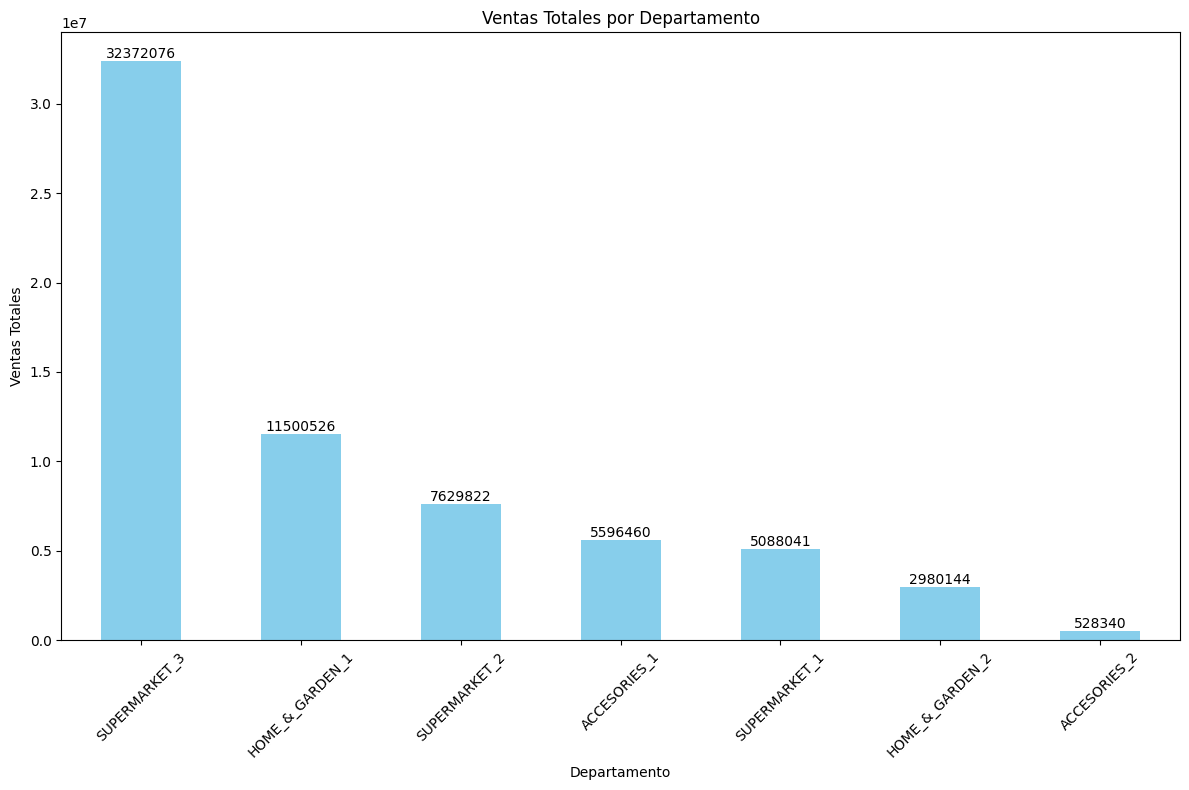

In [77]:


# Filtramos las columnas de ventas diarias y el departamento
sales_by_department = pd2_sales.filter(regex='d_.*|department')

# Agrupamos por departamento y sumamos las ventas totales
total_sales_by_department = sales_by_department.groupby('department').sum().sum(axis=1)

# Ordenamos los departamentos por ventas totales
total_sales_by_department_sorted = total_sales_by_department.sort_values(ascending=False)

# Creamos un gráfico de barras simple
plt.figure(figsize=(12, 8))
total_sales_by_department_sorted.plot(kind='bar', color='skyblue')

# Añadimos los valores de las ventas totales en las barras
for index, value in enumerate(total_sales_by_department_sorted):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')


plt.title('Ventas Totales por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [78]:
# Suma las ventas diarias para cada producto y agrupa por 'department' y 'item'
department_sales = pd2_sales.groupby(['department', 'item'])[sales_columns].sum().sum(axis=1).reset_index(name='total_sales')

# Ordena para encontrar los más vendidos por departamento
most_sold_by_department = department_sales.sort_values(['department', 'total_sales'], ascending=[True, False])

# Ordena para encontrar los menos vendidos por departamento
least_sold_by_department = department_sales.sort_values(['department', 'total_sales'], ascending=[True, True])

In [79]:
department_sales.head()

,department,item,total_sales
0,ACCESORIES_1,ACCESORIES_1_001,4093
1,ACCESORIES_1,ACCESORIES_1_002,5059
2,ACCESORIES_1,ACCESORIES_1_003,1435
3,ACCESORIES_1,ACCESORIES_1_004,39175
4,ACCESORIES_1,ACCESORIES_1_005,14621


In [80]:
most_sold_by_department.head()

,department,item,total_sales
362,ACCESORIES_1,ACCESORIES_1_371,122565
339,ACCESORIES_1,ACCESORIES_1_348,105876
260,ACCESORIES_1,ACCESORIES_1_268,95171
332,ACCESORIES_1,ACCESORIES_1_341,92427
173,ACCESORIES_1,ACCESORIES_1_178,90433


In [81]:
least_sold_by_department.head()

,department,item,total_sales
51,ACCESORIES_1,ACCESORIES_1_052,894
176,ACCESORIES_1,ACCESORIES_1_181,940
205,ACCESORIES_1,ACCESORIES_1_212,943
380,ACCESORIES_1,ACCESORIES_1_389,947
53,ACCESORIES_1,ACCESORIES_1_054,963


In [82]:
# Suma las ventas diarias para cada producto
total_sales_per_product = pd2_sales[sales_columns].sum(axis=1)

# Añade esta suma como una nueva columna en tu DataFrame
pd2_sales['total_sales_2'] = total_sales_per_product

# Ordena el DataFrame basado en 'total_sales' para encontrar los productos más vendidos
most_sold_products = pd2_sales.sort_values('total_sales_2', ascending=False)

# Ahora, 'most_sold_products' contendrá los productos ordenados, con los más vendidos en la parte superior

# Ordena el DataFrame basado en 'total_sales' para encontrar los productos menos vendidos
least_sold_products = pd2_sales.sort_values('total_sales_2', ascending=True)

In [83]:
total_sales_per_product.head()

0     600
1     493
2     288
3    3288
4    1849
dtype: int64

In [84]:
pd2_sales['total_sales_2'].head()

0     600
1     493
2     288
3    3288
4    1849
Name: total_sales_2, dtype: int64

In [85]:
most_sold_products.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales,total_sales_2
8412,SUPERMARKET_3_090_NYC_3,SUPERMARKET_3_090,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,108,132,102,120,106,123,279,175,186,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,420,280,273,254,...,154,135,135,128,113,74,122,137,179,210,83,72,92,182,129,169,166,186,129,96,136,155,178,161,126,141,87,58,155,234,151,100,91,89,83,105,159,115,96,70,102,75,134,123,86,141,56,88,106,166,147,97,101,81,98,74,37,141,116,88

In [86]:
least_sold_products.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales,total_sales_2
6682,HOME_&_GARDEN_1_020_NYC_3,HOME_&_GARDEN_1_020,HOME_&_GARDEN,HOME_&_GARDEN_1,Tribeca,NYC_3,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Ventas por tienda

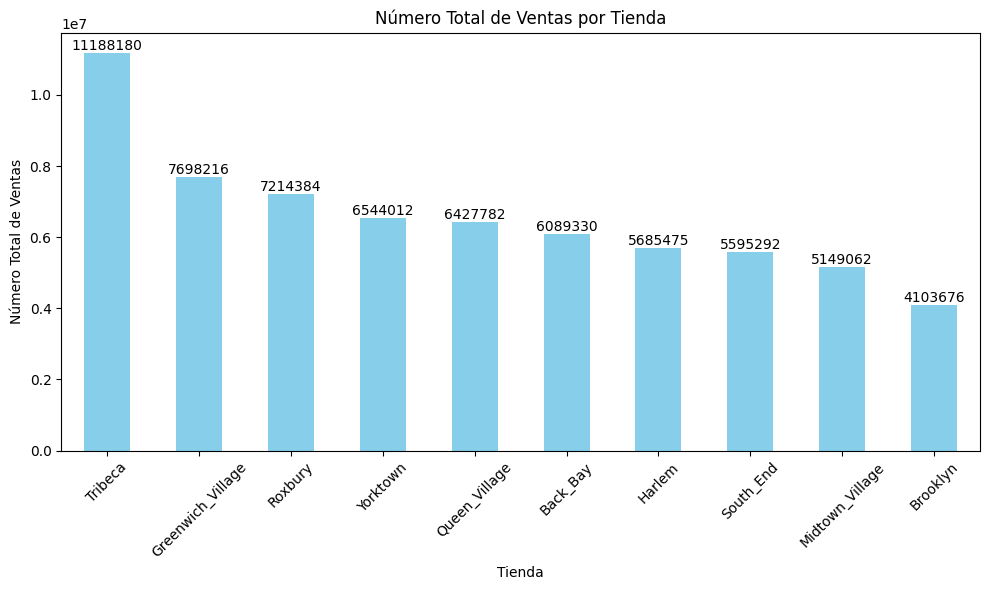

In [87]:
#Ventas totales por tienda 
# Filtramos las columnas de ventas diarias y la tienda
sales_by_store = pd2_sales.filter(regex='^d_.*|^store$')

# Agrupamos por 'store' y sumamos las ventas totales
total_sales_by_store = sales_by_store.groupby('store').sum().sum(axis=1).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
total_sales_by_store.plot(kind='bar', color='skyblue')

# Añadimos los valores de las ventas totales en las barras para que se vea mejor
for index, value in enumerate(total_sales_by_store):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom')


plt.title('Número Total de Ventas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Número Total de Ventas')
plt.xticks(rotation=45) 


plt.tight_layout()
plt.show()                                                                

In [88]:
pd_calendar

,date,weekday,weekday_int,d,event,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,"201,105.00"
1,2011-01-30,Sunday,2,d_2,NaN,"201,105.00"
2,2011-01-31,Monday,3,d_3,NaN,"201,105.00"
3,2011-02-01,Tuesday,4,d_4,NaN,"201,105.00"
4,2011-02-02,Wednesday,5,d_5,NaN,"201,105.00"
...,...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN,"201,616.00"
1909,2016-04-21,Thursday,6,d_1910,NaN,"201,616.00"
1910,2016-04-22,Friday,7,d_1911,NaN,"201,616.00"
1911,2016-04-23,Saturday,1,d_1912,NaN,"201,617.00"


In [89]:
pd_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1913 non-null   datetime64[ns]
 1   weekday      1913 non-null   object        
 2   weekday_int  1913 non-null   int64         
 3   d            1913 non-null   object        
 4   event        26 non-null     object        
 5   yearweek     1913 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 89.8+ KB


### Top 10 productos

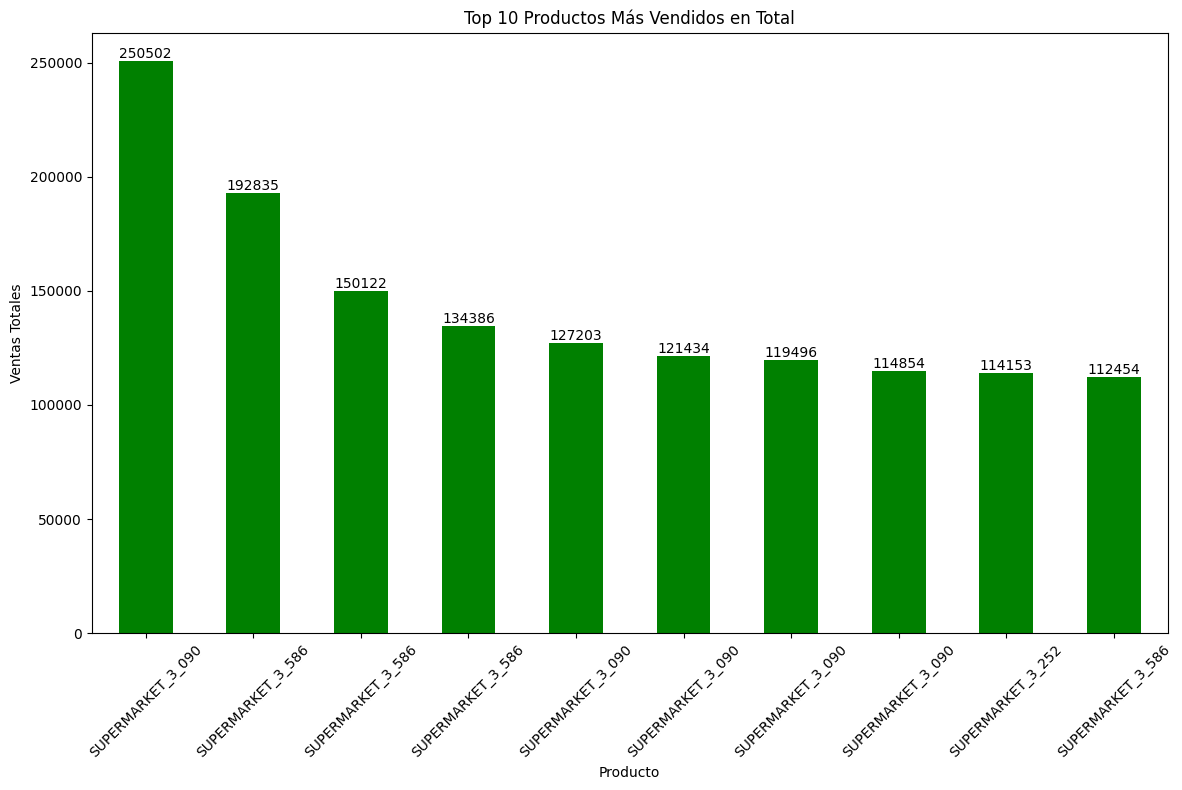

In [90]:

# Sumamos todas las ventas para cada producto
product_sales = pd2_sales.set_index('item').filter(regex='^d_').sum(axis=1).sort_values(ascending=False)

# Seleccionamos los top 10 productos más vendidos
top_10_products = product_sales.head(10)

# Crea el gráfico de barras
plt.figure(figsize=(12, 8))
top_10_products.plot(kind='bar', color='green')


plt.title('Top 10 Productos Más Vendidos en Total')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')

# Muestra los valores en las barras 
for index, value in enumerate(top_10_products):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

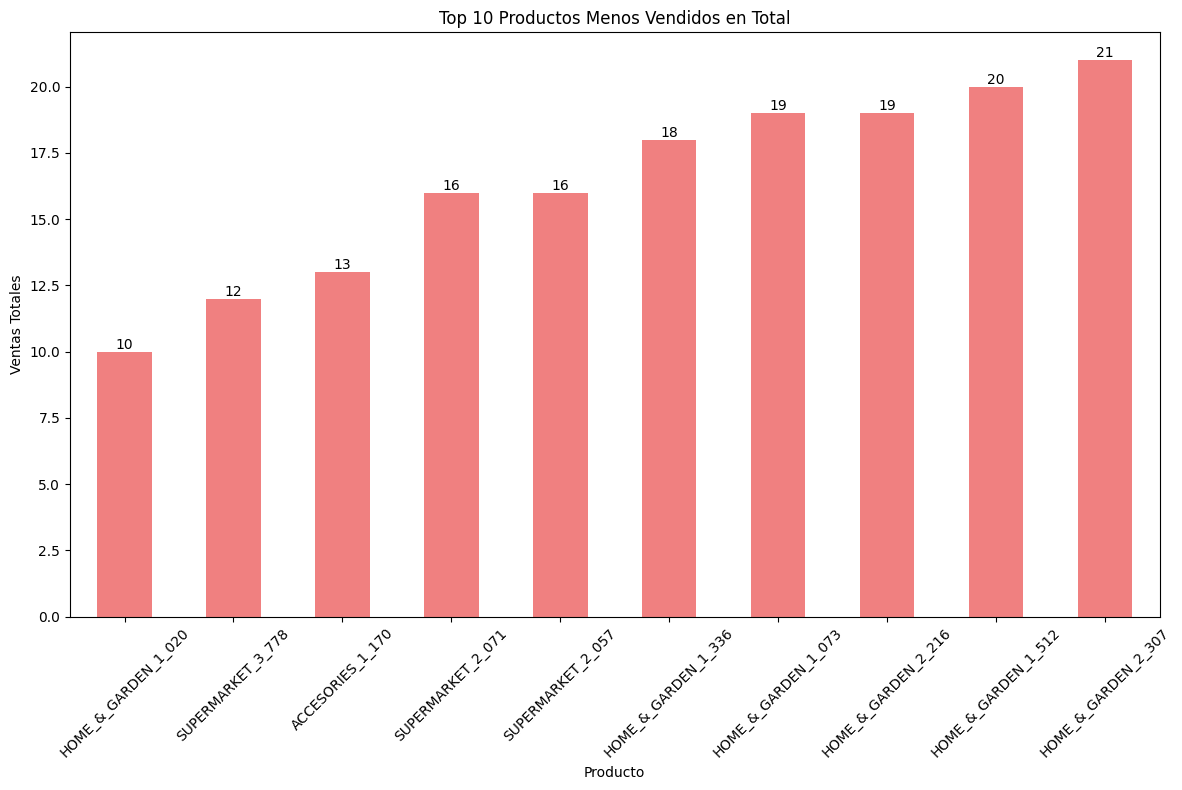

In [91]:
# productos menos vendidos

# Sumamos todas las ventas para cada producto                                                                                         
product_sales = pd2_sales.set_index('item').filter(regex='^d_').sum(axis=1).sort_values(ascending=True)

# Seleccionamos los 10 productos menos vendidos
bottom_10_products = product_sales.head(10)


plt.figure(figsize=(12, 8))
bottom_10_products.plot(kind='bar', color='lightcoral')

plt.title('Top 10 Productos Menos Vendidos en Total')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')

for index, value in enumerate(bottom_10_products):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

### Top meses con más ventas

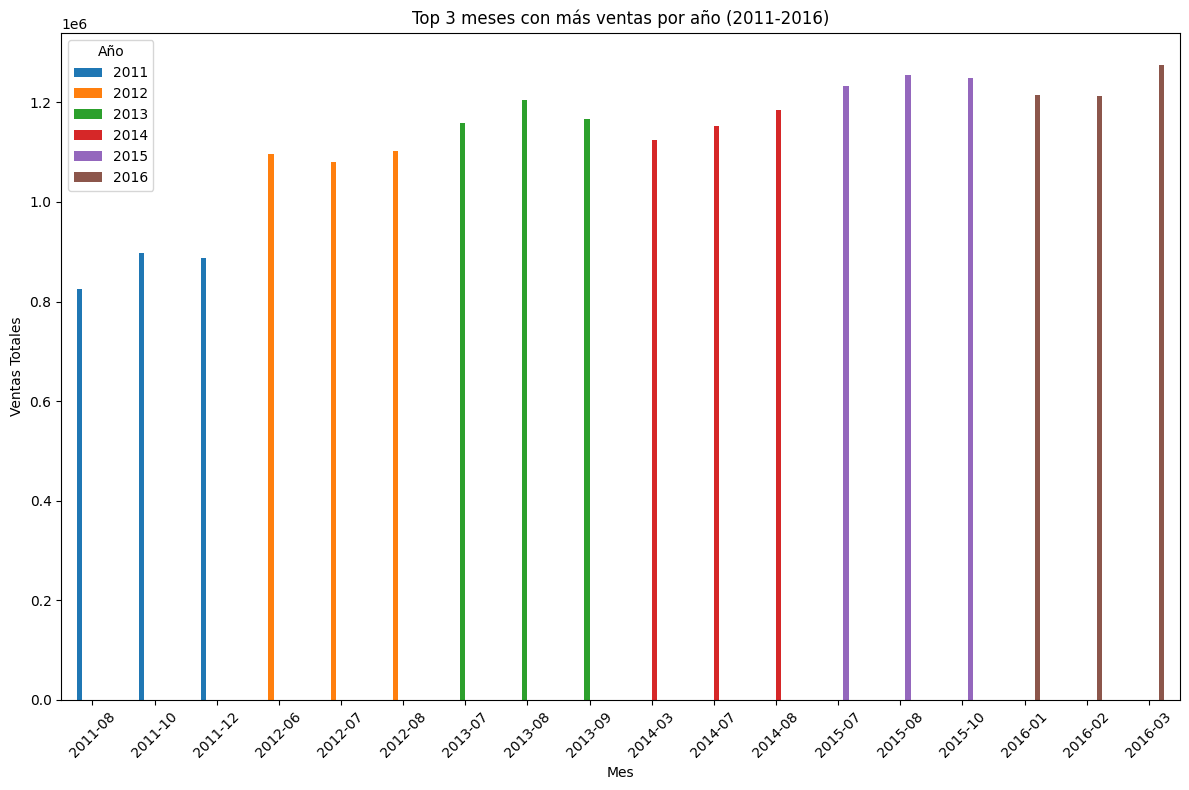

In [92]:
#Este es el código que más se demora en ejecutar en mi caso casi 4min   

#Top meses con más ventas   
# Fusionamos pd_sales con pd_calendar para ver las ventas diarias con las fechas
merged_df = pd_sales.melt(id_vars=['store', 'item', 'department', 'category', 'region'], 
                          var_name='day', value_name='sales')
merged_df = merged_df.merge(pd_calendar[['date', 'd']], left_on='day', right_on='d')

# Convertimos la fecha al formato datetime y extraemos el año y el mes
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.strftime('%Y-%m')  # Año y mes en formato 'Años mes'

# Agrupamos por año y mes y sumamos las ventas
monthly_sales = merged_df.groupby(['year', 'month'])['sales'].sum().reset_index()

# Ordenamos y seleccionamos los top 3 meses con más ventas por año
top_months = monthly_sales.sort_values(['year', 'sales'], ascending=[True, False])
top_months = top_months.groupby('year').head(3)

top_months_pivot = top_months.pivot(index='month', columns='year', values='sales')
top_months_pivot.plot(kind='bar', figsize=(12, 8))


plt.title('Top 3 meses con más ventas por año (2011-2016)')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.legend(title='Año')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Top Precios

In [93]:
pd_prices

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,328.00",12.74
1,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,329.00",12.74
2,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,330.00",10.99
3,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,331.00",10.99
4,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,332.00",10.99
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.20


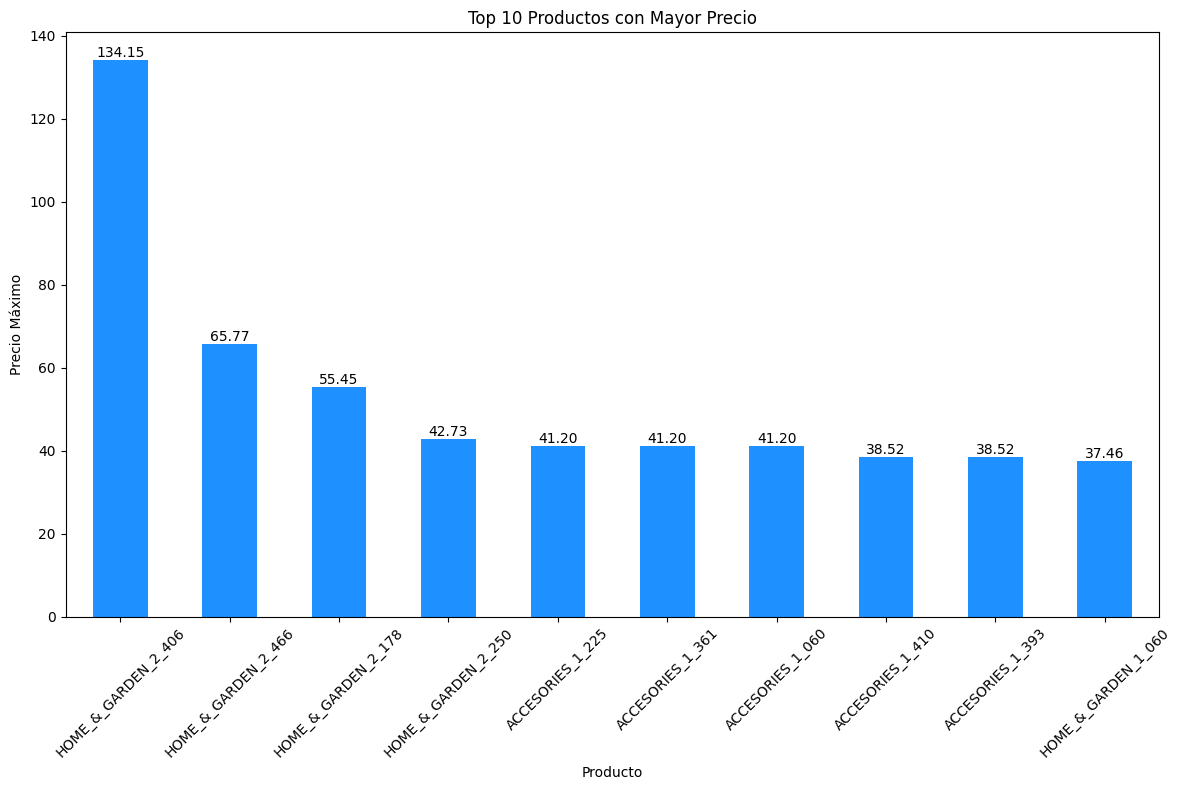

In [94]:
# Primero, encontramos el precio más alto registrado para cada producto
top_prices = pd_prices.groupby('item')['sell_price'].max().sort_values(ascending=False).head(10)

# Creamos un gráfico de barras para visualizar esta información
plt.figure(figsize=(12, 8))
top_prices.plot(kind='bar', color='dodgerblue')


plt.title('Top 10 Productos con Mayor Precio')
plt.xlabel('Producto')
plt.ylabel('Precio Máximo')

# Mostramos los valores de precios en las barras
for index, value in enumerate(top_prices):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

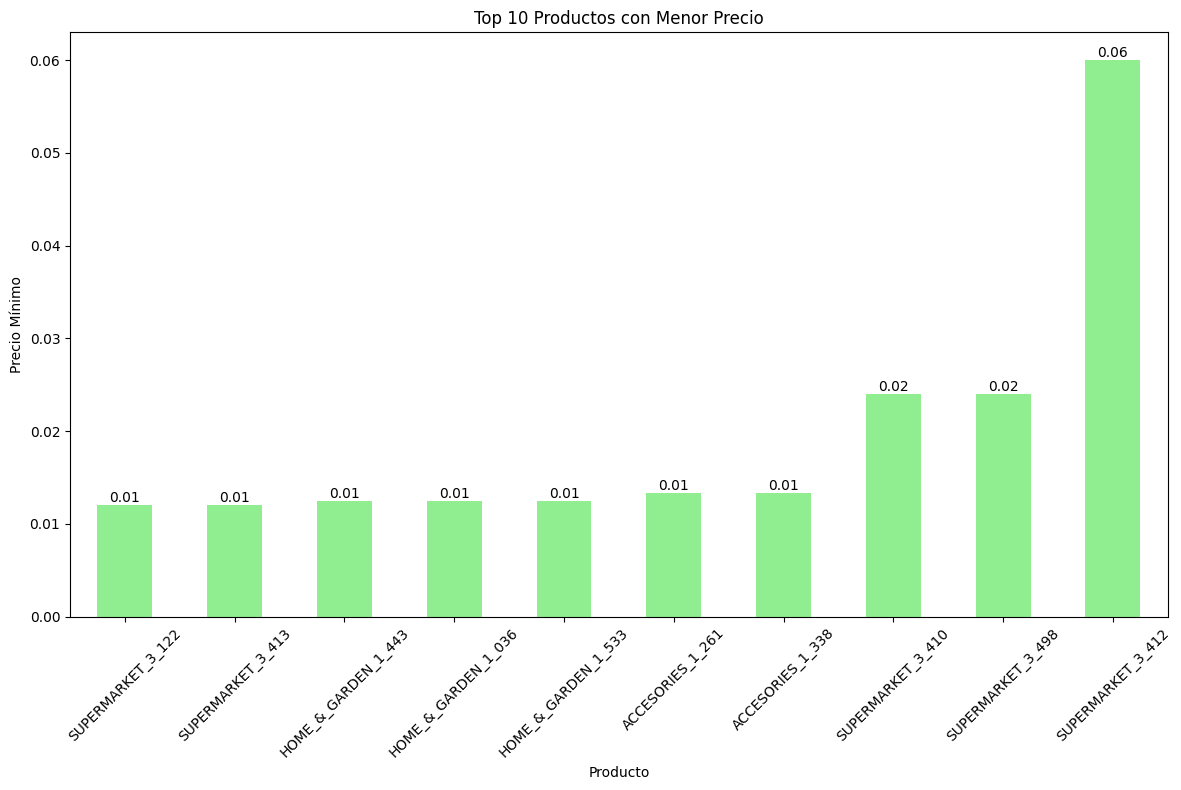

In [95]:
# Filtramos para excluir posibles precios que sean NaN o 0                                      
pd_prices_filtered = pd_prices[pd_prices['sell_price'].notna() & (pd_prices['sell_price'] > 0)]

# Encontramos el precio más bajo registrado para cada producto
bottom_prices = pd_prices_filtered.groupby('item')['sell_price'].min().sort_values(ascending=True).head(10)
plt.figure(figsize=(12, 8))
bottom_prices.plot(kind='bar', color='lightgreen')


plt.title('Top 10 Productos con Menor Precio')
plt.xlabel('Producto')
plt.ylabel('Precio Mínimo')

# Mostramos los valores de precios
for index, value in enumerate(bottom_prices):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## Ventas diarias a lo largo de todo el tiempo

Podemos observar los picos de ventas y en los días que hay muy pocas ventas como en navidad, posiblemente porque ese día está cerrado determinadas tiendas o hay menos actividad                               

In [96]:


d_colum = [i for i in pd_sales.columns if 'd_' in i]
sales_days = pd_sales[d_colum] #selecciona todas las columnas especificadas en la lista "d_colum" de pd_sales. Sales Days es un dataframe de todos los dias "d_" con todas las filas donde están las ventas correspondientes

total_sales = list(sales_days.sum(axis = 0)) #calcula la suma de las ventas de todos los dias de "sales_days" con axis=0 que suma columna por columna. Asi que total_sales tiene las ventas totales por dia

min_date = pd_calendar['date'].min() #almacena la fecha mínima de "date" de pd_calendar1, en este caso es 2011-01-29
max_date = pd_calendar['date'].max() #fecha máxima 2016-04-24 (en total son 1913 días desde  2011-01-29 hasta 2016-04-24)

#fechasrangos contiene el rango de fechas generadas por la función pd.date_range que va desde la primera fecha "min_date" hasta la última fecha. pd.date_range es una función que genera un rango de fechas
fechasrangos = [d for d in pd.date_range(start = min_date, end = max_date)]   #fechasrangos variable que almacena una lista con todas las fechas con el rango ya comentado
ventas_grafic = pd.DataFrame({'date' : fechasrangos,'sales' : total_sales})  # crea un dataframe ventas_grafic,con un diccionario donde las claves"date,sales" son nombres de las columnas y los valores las listas donde fechas rangos contiene la lista de fechas y total_sales lista de las ventas totales por fecha
                                                                            #resumen ventas grafic tiene 2 columnas date y sales, date son las fechas y sales son las ventas totales de alguna fecha

fig = go.Figure() # Crea la figura


fig.add_trace(go.Scatter(x=ventas_grafic['date'], y=ventas_grafic['sales'],  # Agrega traza de línea
                         mode='lines', name='Ventas'))


fig.add_trace(go.Scatter(x=ventas_grafic['date'], y=ventas_grafic['sales'],  # Agrega los puntos
                         mode='markers', name='Día',
                         marker=dict(color='red'))) 

# Configura el diseño del gráfico
fig.update_layout(title='Total de ventas por fecha', 
                  xaxis_title='Fecha', 
                  yaxis_title='Ventas',
                  xaxis=dict(
                      tickformat='%Y-%m-%d',  # Formato de fecha año-mes-día
                      tickangle=45            
                  ))

fig.show()